In [1]:
#import modules 
%pylab inline 
#matplotlib notebook 
import os 
import nglview as nv
import mdtraj as mdt
Sim_Direc = !(ls -d */)
bas_dir = !pwd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
%qtconsole

In [2]:
DPPG_fol=[]
DMPG_fol=[]
for i in Sim_Direc:
    if("DMPG" not in i and ("DPPG" in i or "PG" in i)):
        DPPG_fol.append(i)
    if("DMPG" in i or "MG" in i):
        DMPG_fol.append(i)
DMPG_fol

['15STX-DMPG/', 'MEM-MG/', 'STX-DMPG/', 'STXQM-DMPG/']

In [3]:
myorder = [1,2,3,0]
DMPG_fol = [DMPG_fol[i] for i in myorder]
DMPG_fol

['MEM-MG/', 'STX-DMPG/', 'STXQM-DMPG/', '15STX-DMPG/']

In [4]:
myorder = [1,2,3,0]
DPPG_fol = [DPPG_fol[i] for i in myorder]
DPPG_fol

['MEM-PG/', 'STX-DPPG/', 'STXQM-DPPG/', '15STX-DPPG/']

In [ ]:
# list for results of every calculated property

In [ ]:
for direc in Sim_Direc:
    plt.figure(figsize=(9,7))
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:    
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            plt.xlabel("t (ns)")
            plt.ylabel("APL $(nm^2)$")
            plt.title("time vs APL of {}".format(direc[:-1]))
            plt.plot(APL[:,0]/1000,APL[:,1],label=("{}".format(replica)))
            plt.axhline(np.mean(APL[:,1]),c="black",linestyle='--',label="mean {:.3f}".format(np.mean(APL[:,1])))
            plt.legend(loc=(1.05,0.25))
        except:
            print("No data {} ".format(direc))
    plt.show()

In [ ]:
# plot APL vs time of every system in the same subplot 
fig,ax  = plt.subplots(8,sharex=False,figsize=(15,20))
for j,direc in enumerate(Sim_Direc):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))      
            ax[j].plot(APL[:,0],APL[:,1],label=("{}-{}".format(direc,replica)))
            ax[j].set_title("{}".format(direc))
            #fig.add_subplot(box_z[:,0],APL[:-1],label=("{}-{}".format(direc,replica)))
            #ax.axhline(np.mean(APL),c="black",linestyle='--',label="promedio {:.3f}".format(np.mean(box_z[:,1])))
            #plt.legend(loc=(1.05,0.25))
        except:
            print("no data  {}".format(direc))
plt.xlabel("t (ps)")
plt.ylabel("APL (nm)")
fig.tight_layout()

# TIME TRACES BY LIPID SYSTEM 


In [ ]:
# plot APL vs time of every system in the same subplot 
fig,ax  = plt.subplots(4,2,sharex=False,figsize=(10,12))
for j,direc in enumerate(DPPG_fol):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)) 
            ax[j][0].plot(APL[:,0]/1000,APL[:,1],label=("{}-{}".format(name,replica)))
            ax[j][0].set_title("{}".format(name))
            plt.setp(ax[j][0].get_xticklabels(), fontsize=14)
            plt.xlabel("t (ns)")
            plt.ylabel("APL (nm)")
        except:
            #print("no data  {}".format(direc))
            print("",end="")
        if("MEM" in direc):
            break
for j,direc in enumerate(DMPG_fol):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            #print("APL of {}-{}  is = {}".format(direc,replica,np.mean(APL)))   
            ax[j][1].plot(APL[:,0]/1000,APL[:,1],label=("{}-{}".format(name,replica)))
            ax[j][1].set_title("{}".format(name))
            plt.setp(ax[j][1].get_xticklabels(), fontsize=14)
            plt.xlabel("t (ns)")
            plt.ylabel("APL (nm)")
        except:
            #print("no data  {}".format(direc))
            print("",end="")
        if("MEM" in direc):
            break
for axs in ax.flat:
    axs.set(xlabel='time (ns)', ylabel='APL $(nm^2)$ ')

fig.tight_layout()

# Histogram of APL of all simulations 

In [ ]:
plt.figure(figsize=(10,12))
for direc in Sim_Direc:
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            if("15" in direc):
                N=362
            else:
                N=128        
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)) 
            apl.extend(APL[:,1])
            if(replica==5):
                print(" {} ".format(direc))
                print("APL mean {}".format(np.mean(apl)))
                print("APL std {}".format(np.std(apl)))
                print("Std error {} \n ".format(np.std(apl)/sqrt(4)))
                plt.hist(apl,bins=70,alpha=0.3,label="{}".format(direc),density=True)
        except:
            print("No data {}".format(direc))
        if("MEM" in direc):
            print(" {} ".format(direc))
            print("APL mean {}".format(np.mean(apl)))
            print("APL std {}".format(np.std(apl)))
            print("Std error {} \n ".format(np.std(apl)/sqrt(4)))
            plt.hist(apl,bins=70,alpha=0.3,label="{}".format(direc),density=True)
            break
plt.legend()   
plt.title("Histogram of all systems ")

# APL and boxplots by lipid system 

reading from MEM-PG/1   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from MEM-MG/1   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

Text(0, 0.5, 'APL $(nm^2)$')

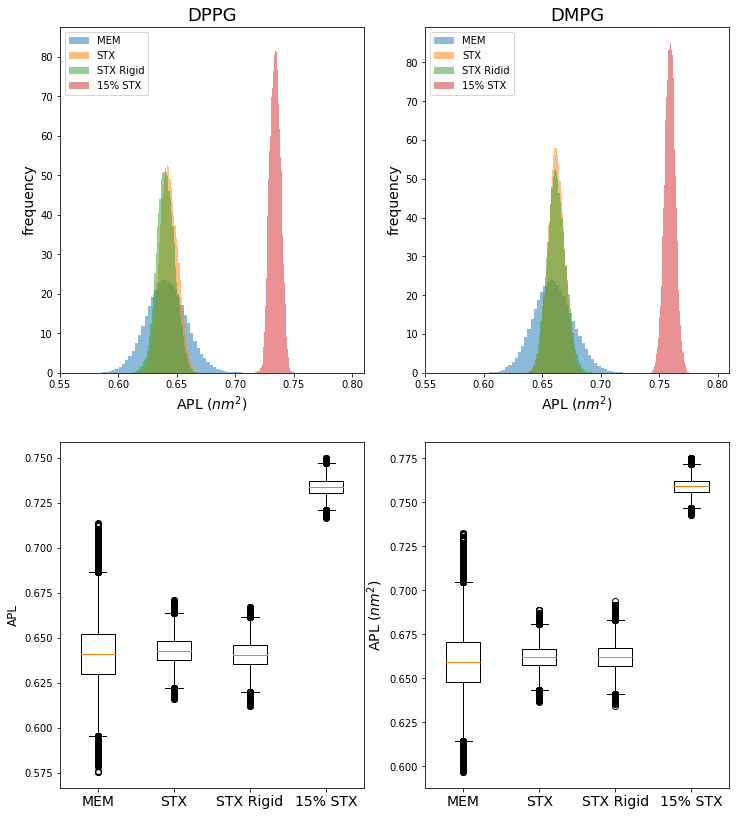

In [6]:
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,14))
names = ["MEM","STX","STX Rigid","15% STX"]
bygroup_apl_dppg = []
for j,direc in enumerate(DPPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        if("MEM" in direc):
            bygroup_apl_dppg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dppg.append((mean,std))
            
ax[0][0].hist(bygroup_apl_dppg[0],label="MEM",bins=50,alpha=0.5,density=True)
ax[0][0].hist(bygroup_apl_dppg[1][0],label="STX",bins=50,alpha=0.5,density=True)
ax[0][0].hist(bygroup_apl_dppg[2][0],label="STX Rigid",bins=50,alpha=0.5,density=True)
ax[0][0].hist(bygroup_apl_dppg[3][0],label="15% STX",bins=50,alpha=0.5,density=True)
ax[0][0].set_title("DPPG",fontsize=18)
ax[0][0].set_xlim(0.55,0.81)
ax[0][0].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0][0].set_ylabel("frequency",fontsize=14)
ax[0][0].legend()
data = [bygroup_apl_dppg[0],bygroup_apl_dppg[1][0],bygroup_apl_dppg[2][0],bygroup_apl_dppg[3][0]]
ax[1][0].boxplot(data) 
ax[1][0].set_ylabel("APL",fontsize=12)
ax[1][0].set_xticklabels(names,fontsize=14)


bygroup_apl_dmpg = []
for j,direc in enumerate(DMPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        if("MEM" in direc):
            bygroup_apl_dmpg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dmpg.append((mean,std))


ax[0][1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5,density=True)
ax[0][1].hist(bygroup_apl_dmpg[1][0],label="STX",bins=50,alpha=0.5,density=True)
ax[0][1].hist(bygroup_apl_dmpg[2][0],label="STX Ridid",bins=50,alpha=0.5,density=True)
ax[0][1].hist(bygroup_apl_dmpg[3][0],label="15% STX",bins=50,alpha=0.5,density=True)
ax[0][1].set_title("DMPG",fontsize=18)
ax[0][1].set_xlim(0.55,0.81)
ax[0][1].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0][1].set_ylabel("frequency",fontsize=14)
ax[0][1].legend()
#dict_dmg = {'STX_DMPG':bygroup_apl_dmpg[1],'STXQM_DMPG':bygroup_apl_dmpg[2] ,'15STX_DMPG':bygroup_apl_dmpg[3]}
#df=pd.DataFrame(dict_dmg)
data = [bygroup_apl_dmpg[0],bygroup_apl_dmpg[1][0],bygroup_apl_dmpg[2][0],bygroup_apl_dmpg[3][0]]
ax[1][1].boxplot(data) 
ax[1][1].set_xticklabels(names,fontsize=14)
ax[1][1].set_ylabel("APL $(nm^2)$",fontsize=14)

In [ ]:
bygroup_apl_dmpg

In [ ]:
y, binEdges = np.histogram(bygroup_apl_dppg[1][0],bins=len(bygroup_apl_dppg[1][0]))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.scatter(bincenters,y)
#ax[0][0].errorbar(bincenters,y, color='r', xerr=bygroup_apl_dppg[1][1])

In [ ]:
len(bygroup_apl_dppg[1][1])

In [ ]:
a = np.stack(apl,axis=0)

In [ ]:
np.std(a,axis=0)

In [ ]:
y,x = np.histogram(bygroup_apl_dppg[1],bins=50)
bincenters = 0.5*(x[1:]+x[:-1])
menStd     = np.sqrt(y)
width      = 0.05
plt.bar(x, y, width=width, color='r', xerr=0.5)
plt.show()

In [ ]:
# plot APL vs time of every system in the same subplot 
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,14))
bygroup_apl_dppg = []
for j,direc in enumerate(DPPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
            print("reading from {}   ".format(work_dir),end="")
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            apl.extend(APL[:,1])
        except:
            print("no data  {}  ".format(direc),end="")
    bygroup_apl_dppg.append(apl)
        #print("APL of {}-{}  is = {}".format(direc,replica,np.mean(APL)))
ax[0][0].hist(bygroup_apl_dppg[0],label="MEM",bins=50,alpha=0.5)
ax[0][0].hist(bygroup_apl_dppg[1],label="STX_DPPG",bins=50,alpha=0.5)
ax[0][0].hist(bygroup_apl_dppg[2],label="STXQM_DPPG",bins=50,alpha=0.5)
ax[0][0].hist(bygroup_apl_dppg[3],label="15STX_DPPG",bins=50,alpha=0.5)
ax[0][0].set_title("DPPG")
ax[0][0].set_xlim(0.55,0.81)
ax[0][0].set_xlabel("APL")
ax[0][0].set_ylabel("frequency")
ax[0][0].legend()
ax[1][0].boxplot(bygroup_apl_dppg) 
ax[1][0].set_ylabel("APL")
ax[1][0].set_xticklabels(DPPG_fol,fontsize=8)
bygroup_apl_dmpg = []
for j,direc in enumerate(DMPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:
            print("reading from {}   ".format(work_dir),end="")
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            apl.extend(APL[:,1])
        except:
            print("no data  {}  ".format(direc),end="")
    bygroup_apl_dmpg.append(apl)
ax[0][1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5)
ax[0][1].hist(bygroup_apl_dmpg[1],label="STX_DMPG",bins=50,alpha=0.5)
ax[0][1].hist(bygroup_apl_dmpg[2],label="STXQM_DMPG",bins=50,alpha=0.5)
ax[0][1].hist(bygroup_apl_dmpg[3],label="15STX_DMPG",bins=50,alpha=0.5)
ax[0][1].set_title("DMPG")
ax[0][1].set_xlim(0.55,0.81)
ax[0][1].set_xlabel("APL")
ax[0][1].set_ylabel("frequency")
ax[0][1].legend()

ax[1][1].boxplot(bygroup_apl_dmpg)
ax[1][1].set_xticklabels(DMPG_fol,fontsize=8)
ax[1][1].set_ylabel("APL")
fig.tight_layout()

# Order parameter  MEM chain 1 and chain 2 

In [ ]:
for direc in Sim_Direc:
    
    for replica in range(1,6):
        try:
            work_dir = ("{}{}".format(direc,replica))
            #print("{}/{}/{}_{}deu_chain1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            plt.figure(figsize=(4,6))
            plt.title("Order parameter of {}-{}".format(direc,replica))
            plt.scatter(np.arange(1,13),order_param_1[:,1],label="chain 1")
            plt.xticks(np.arange(1,13))
            order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            #plt.title("Order parameter of {}-{}".format(direc,replica))
            plt.scatter(np.arange(1,13),order_param_2[:,1],label="chain 2")
            plt.legend()
        except:
            print("no data in {}".format(direc))

In [ ]:
# sub plot by system
fig , ax = plt.subplots(8,figsize=(12,14))
for j,direc in enumerate(Sim_Direc2):
    for replica in range(1,6):
        try:
            work_dir = ("{}{}".format(direc,replica))
            #print("{}/{}/{}_{}deu_chain1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            ax[j].set_title("Order parameter of {}".format(direc))
            ax[j].scatter(order_param_1[:,0],order_param_1[:,1],label="chain_1",c='r',s=0.2)
            order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            #plt.figure(figsize=(10,10))
            #plt.title("Order parameter of {}-{}".format(direc,replica))
            ax[j].scatter(order_param_2[:,0],order_param_2[:,1],label="chain_2",c='b',s=0.2)

        except:
            print("no data in {}".format(direc))
    #ax[j].legend()

fig.tight_layout()

In [ ]:
fig,ax  = plt.subplots(1,2 , sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(9,7))
bt_op_ch1_dppg = []
bt_op_ch2_dppg = []

for j,direc in enumerate(DPPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dppg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dppg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dppg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[0][0],label=" STX")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[0][0],yerr=bt_op_ch1_dppg[0][1],ls="none")


ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[1][0],label=" STX Rigid")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[1][0],yerr=bt_op_ch1_dppg[1][1],ls="none")


ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[2][0],label=" 15% STX")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[2][0],yerr=bt_op_ch1_dppg[2][1],ls="none")

ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[0][0],label=" STX")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[0][0],yerr=bt_op_ch2_dppg[0][1],ls="none")


ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[1][0],label=" STX Rigid")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[1][0],yerr=bt_op_ch2_dppg[1][1],ls="none")


ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[2][0],label=" 15% STX")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[2][0],yerr=bt_op_ch2_dppg[2][1],ls="none")


ax[1].legend()
fig.suptitle("ORDER PARAMETER DPPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)


reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

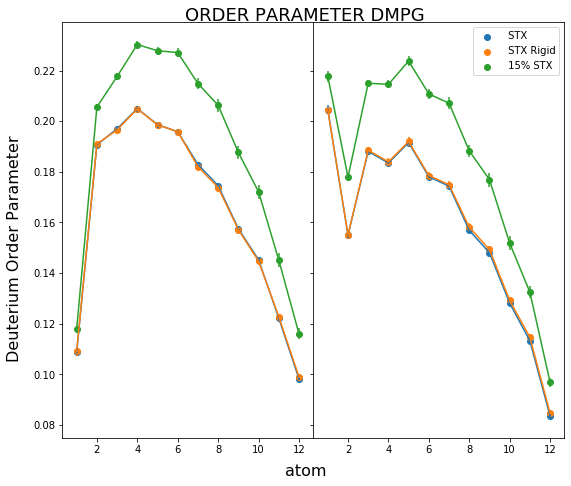

In [8]:
fig,ax  = plt.subplots(1,2 , sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(9,7))
bt_op_ch1_dmpg = []
bt_op_ch2_dmpg = []

for j,direc in enumerate(DMPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dmpg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dmpg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dmpg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
        
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[0][0],label=" STX")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[0][0],yerr=bt_op_ch1_dmpg[0][1])
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[1][0],label=" STX Rigid")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[1][0],yerr=bt_op_ch1_dmpg[1][1])
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[2][0],label=" 15% STX")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[2][0],yerr=bt_op_ch1_dmpg[2][1])

ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[0][0],label=" STX")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[0][0],yerr=bt_op_ch2_dmpg[0][1])
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[1][0],label=" STX Rigid")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[1][0],yerr=bt_op_ch2_dmpg[1][1])
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[2][0],label=" 15% STX")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[2][0],yerr=bt_op_ch2_dmpg[2][1])

fig.suptitle("ORDER PARAMETER DMPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)
ax[1].legend()

reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   
12


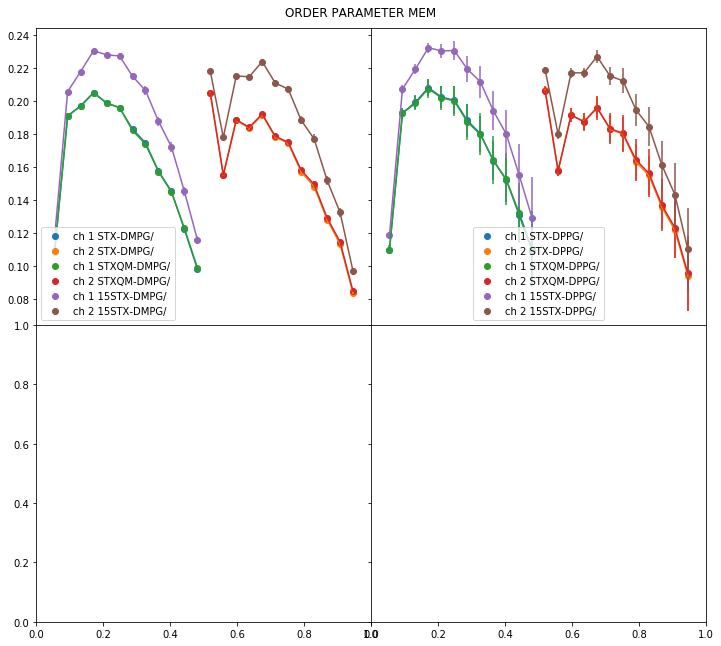

In [9]:
fig,ax  = plt.subplots(2,2, sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(12,10))
bt_op_ch1_dppg = []
bt_op_ch2_dppg = []
bt_op_ch1_dmpg = []
bt_op_ch2_dmpg = []
for j,direc in enumerate(DPPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            ch1.extend(order_param_1)
            ch2.extend(order_param_2)
        except:
            print("no data  {}  ".format(direc),end="")
    bt_op_ch1_dppg.append(ch1)
    bt_op_ch2_dppg.append(ch2)
for j,direc in enumerate(DMPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            ch1.extend(order_param_1)
            ch2.extend(order_param_2)
        except:
            print("no data  {}  ".format(direc),end="")
    bt_op_ch1_dmpg.append(ch1)
    bt_op_ch2_dmpg.append(ch2)
print("")
bt_op_ch1_dmpg = np.asarray(bt_op_ch1_dmpg)
bt_op_ch2_dmpg = np.asarray(bt_op_ch2_dmpg)
bt_op_ch1_dppg = np.asarray(bt_op_ch1_dppg)
bt_op_ch2_dppg = np.asarray(bt_op_ch2_dppg)
#b = np.where(bt_op_ch1_dmpg[0][:,0]==1.)
#print(b)
name =np.concatenate((np.arange(1,13),np.arange(1,13)))
print(name[-1])
for j,z in enumerate(DMPG_fol[1:]):
    stat_ch1 =[] 
    stat_ch2 =[]
    for i in range(12):
        listt=[bt_op_ch1_dmpg[j][:,1][i],bt_op_ch1_dmpg[j][:,1][i+12],bt_op_ch1_dmpg[j][:,1][i+24],bt_op_ch1_dmpg[j][:,1][i+36],bt_op_ch1_dmpg[j][:,1][i+48]]
        stat_ch1.append((np.mean(np.mean(listt)),np.std(listt)))
        listt2=[bt_op_ch2_dmpg[j][:,1][i],bt_op_ch2_dmpg[j][:,1][i+12],bt_op_ch2_dmpg[j][:,1][i+24],bt_op_ch2_dmpg[j][:,1][i+36],bt_op_ch2_dmpg[j][:,1][i+48]]
        stat_ch2.append((np.mean(np.mean(listt2)),np.std(listt2)))
    ax[0][0].scatter(np.arange(1,13),np.asarray(stat_ch1)[:,0],label="ch 1 {}".format(z))
    ax[0][0].errorbar(np.arange(1,13),np.asarray(stat_ch1)[:,0],yerr=np.asarray(stat_ch1)[:,1])
    
    ax[0][0].scatter(np.arange(13,25),np.asarray(stat_ch2)[:,0],label="ch 2 {}".format(z))
    ax[0][0].errorbar(np.arange(13,25),np.asarray(stat_ch2)[:,0],yerr=np.asarray(stat_ch1)[:,1])
    ax[0][0].set_xticks(name)
    ax[0][0].set_xticklabels(name,fontsize=9)
    ax[0][0].legend()
for j,z in enumerate(DPPG_fol[1:]):
    stat_ch1 =[] 
    stat_ch2 =[]
    for i in range(12):
        listt=[bt_op_ch1_dppg[j][:,1][i],bt_op_ch1_dmpg[j][:,1][i+12],bt_op_ch1_dmpg[j][:,1][i+24],bt_op_ch1_dmpg[j][:,1][i+36],bt_op_ch1_dmpg[j][:,1][i+48]]
        stat_ch1.append((np.mean(np.mean(listt)),np.std(listt)))
        listt2=[bt_op_ch2_dppg[j][:,1][i],bt_op_ch2_dmpg[j][:,1][i+12],bt_op_ch2_dmpg[j][:,1][i+24],bt_op_ch2_dmpg[j][:,1][i+36],bt_op_ch2_dmpg[j][:,1][i+48]]
        stat_ch2.append((np.mean(np.mean(listt2)),np.std(listt2)))
    ax[0][1].scatter(np.arange(1,13),np.asarray(stat_ch1)[:,0],label="ch 1 {}".format(z))
    ax[0][1].errorbar(np.arange(1,13),np.asarray(stat_ch1)[:,0],yerr=np.asarray(stat_ch1)[:,1])
    
    ax[0][1].scatter(np.arange(13,25),np.asarray(stat_ch2)[:,0],label="ch 2 {}".format(z))
    ax[0][1].errorbar(np.arange(13,25),np.asarray(stat_ch2)[:,0],yerr=np.asarray(stat_ch1)[:,1])
    ax[0][1].set_xticks(name)
    ax[0][1].set_xticklabels(name,fontsize=9)
    ax[0][1].legend()
fig.suptitle("ORDER PARAMETER MEM")
                   
plt.subplots_adjust(top=0.95)

# OP of STX

no data in 15STX-DMPG/
no data in 15STX-DMPG/
no data in 15STX-DMPG/
no data in 15STX-DMPG/
no data in 15STX-DMPG/
no data in 15STX-DPPG/
no data in 15STX-DPPG/
no data in 15STX-DPPG/
no data in 15STX-DPPG/
no data in 15STX-DPPG/
no data in MEM-MG/
no data in MEM-MG/
no data in MEM-MG/
no data in MEM-MG/
no data in MEM-MG/
no data in MEM-PG/
no data in MEM-PG/
no data in MEM-PG/
no data in MEM-PG/
no data in MEM-PG/
no data in STX-DMPG/
no data in STX-DMPG/
no data in STX-DMPG/
no data in STX-DMPG/
no data in STX-DMPG/
no data in STX-DPPG/
no data in STX-DPPG/
no data in STX-DPPG/
no data in STX-DPPG/
no data in STX-DPPG/
no data in STXQM-DMPG/
no data in STXQM-DMPG/
no data in STXQM-DMPG/
no data in STXQM-DMPG/
no data in STXQM-DMPG/
no data in STXQM-DPPG/
no data in STXQM-DPPG/
no data in STXQM-DPPG/
no data in STXQM-DPPG/
no data in STXQM-DPPG/


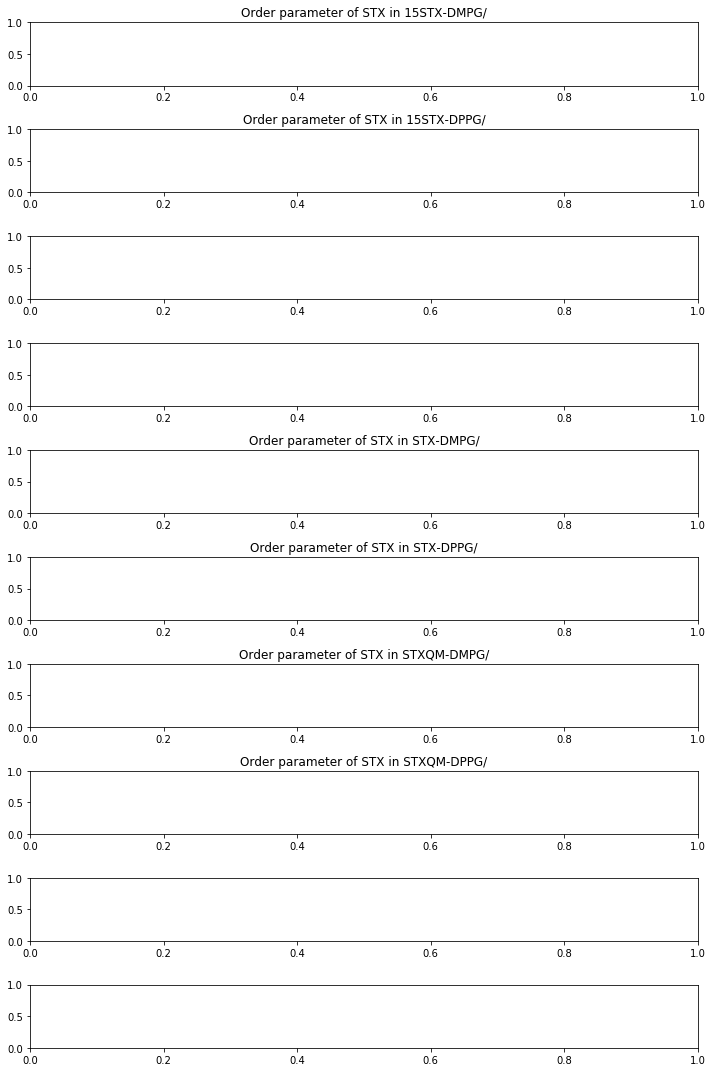

In [11]:
# sub plot of order paraemter per STX by system
fig , ax = plt.subplots(10,figsize=(10,15))
for j,direc in enumerate(Sim_Direc):  
    for replica in range(1,6):
        try:
            work_dir = ("{}{}".format(direc,replica))
            #print("{}/{}/{}_{}deu_chain1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            ax[j].set_title("Order parameter of STX in {}".format(direc))
            ax[j].scatter(list(np.arange(23,47)),order_param_1[:,1],label="chain_1",s=0.4)
            ax[j].set_xticks(np.arange(23,48))

        except:
            print("no data in {}".format(direc))
        #ax[j].legend()
    
    fig.tight_layout()

reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPP

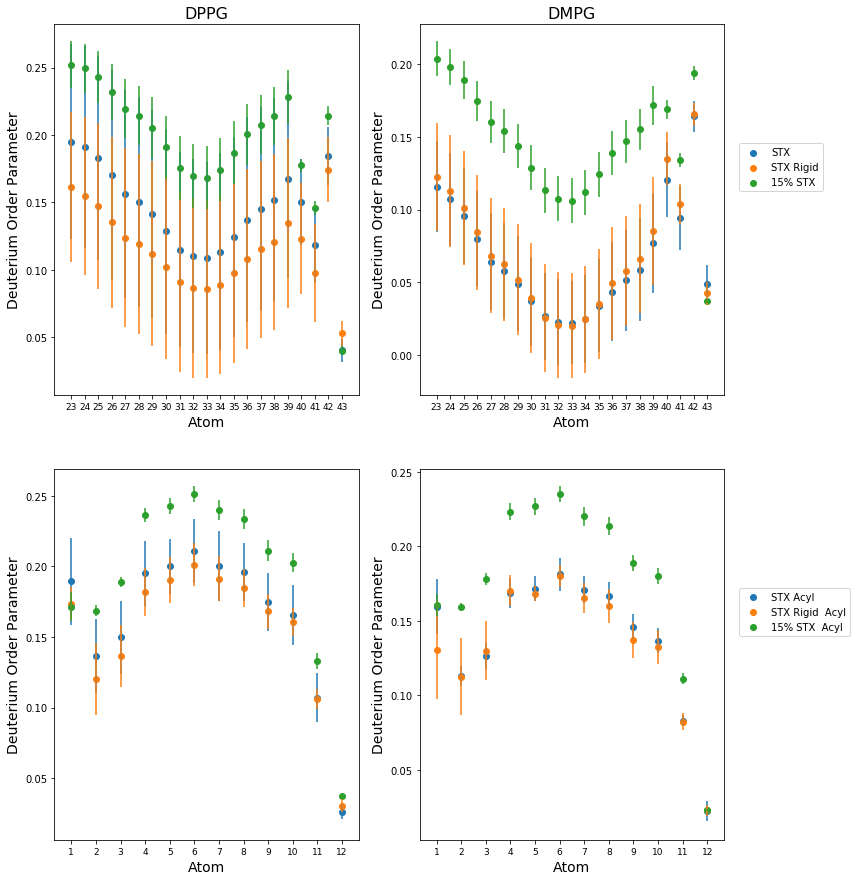

In [67]:
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,15))
byg_opstx_dppg = []
for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dppg.append((mean,std))

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[0][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[0][0],yerr=byg_opstx_dppg[0][1],ls="none")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[1][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[1][0],yerr=byg_opstx_dppg[1][1],ls="none")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[2][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[2][0],yerr=byg_opstx_dppg[2][1],ls="none")

ax[0][0].set_xticks(np.arange(23,44))
ax[0][0].set_xticklabels(np.arange(23,44),fontsize=9)
ax[0][0].set_xlabel("Atom",fontsize=14)
ax[0][0].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][0].set_title("DPPG",fontsize=16)




byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dmpg.append((mean,std))

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[0][0],label="STX")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[0][0],yerr=byg_opstx_dmpg[0][1],ls="none")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[1][0],label="STX Rigid")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[1][0],yerr=byg_opstx_dmpg[1][1],ls="none")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[2][0],label="15% STX ")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[2][0],yerr=byg_opstx_dmpg[2][1],ls="none")

ax[0][1].set_xticks(np.arange(23,44))
ax[0][1].set_xticklabels(np.arange(23,44),fontsize=9)
ax[0][1].set_xlabel("Atom",fontsize=14)
ax[0][1].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][1].set_title("DMPG",fontsize=16)
ax[0][1].legend(loc=(1.05,0.55))




### ACYL CHAIN ORDER PARAMETER $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

byg_opstx_dppg = []


for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ACYL_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dppg.append((mean,std))

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[0][0])
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[0][0],yerr=byg_opstx_dppg[0][1],ls="none" )

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[1][0])
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[1][0],yerr=byg_opstx_dppg[1][1],ls="none")

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[2][0])
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[2][0],yerr=byg_opstx_dppg[2][1],ls="none")

ax[1][0].set_xticks(np.arange(1,13))
ax[1][0].set_xticklabels(np.arange(1,13),fontsize=9)
ax[1][0].set_xlabel("Atom",fontsize=14)
ax[1][0].set_ylabel("Deuterium Order Parameter",fontsize=14)


byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ACYL_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dmpg.append((mean,std))

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[0][0],label="STX Acyl")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[0][0],yerr=byg_opstx_dmpg[0][1],ls="none")

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[1][0],label="STX Rigid  Acyl")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[1][0],yerr=byg_opstx_dmpg[1][1],ls="none")

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[2][0],label="15% STX  Acyl ")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[2][0],yerr=byg_opstx_dmpg[2][1],ls="none")

ax[1][1].set_xticks(np.arange(1,13))
ax[1][1].set_xticklabels(np.arange(1,13),fontsize=9)
ax[1][1].set_xlabel("Atom",fontsize=14)
ax[1][1].set_ylabel("Deuterium Order Parameter",fontsize=14)

ax[1][1].legend(loc=(1.05,0.55))

reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

TypeError: arange: scalar arguments expected instead of a tuple.

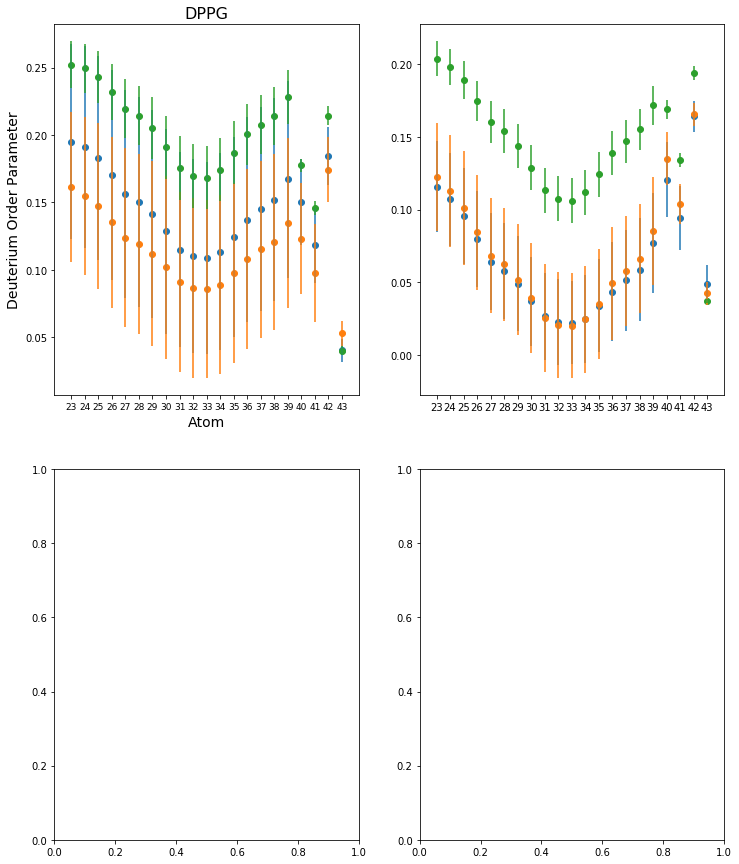

In [57]:
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,15))
byg_opstx_dppg = []
for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dppg.append((mean,std))

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[0][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[0][0],yerr=byg_opstx_dppg[0][1],ls="none")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[1][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[1][0],yerr=byg_opstx_dppg[1][1],ls="none")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[2][0])
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[2][0],yerr=byg_opstx_dppg[2][1],ls="none")

ax[0][0].set_xticks(np.arange(23,44))
ax[0][0].set_xticklabels(np.arange(23,44),fontsize=9)
ax[0][0].set_xlabel("Atom",fontsize=14)
ax[0][0].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][0].set_title("DPPG",fontsize=16)




byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dmpg.append((mean,std))

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[0][0],label="STX")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[0][0],yerr=byg_opstx_dmpg[0][1],ls="none")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[1][0],label="STX Rigid")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[1][0],yerr=byg_opstx_dmpg[1][1],ls="none")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[2][0],label="15% STX ")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[2][0],yerr=byg_opstx_dmpg[2][1],ls="none")

ax[0][1].set_xticks(np.arange(23,44))
ax[0][1].set_xticklabels(np.arange((23,44)),fontsize=9)
ax[0][1].set_xlabel("Atom",fontsize=14)
ax[0][1].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][1].set_title("DMPG",fontsize=16)



reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   

IndexError: index 105 is out of bounds for axis 0 with size 105

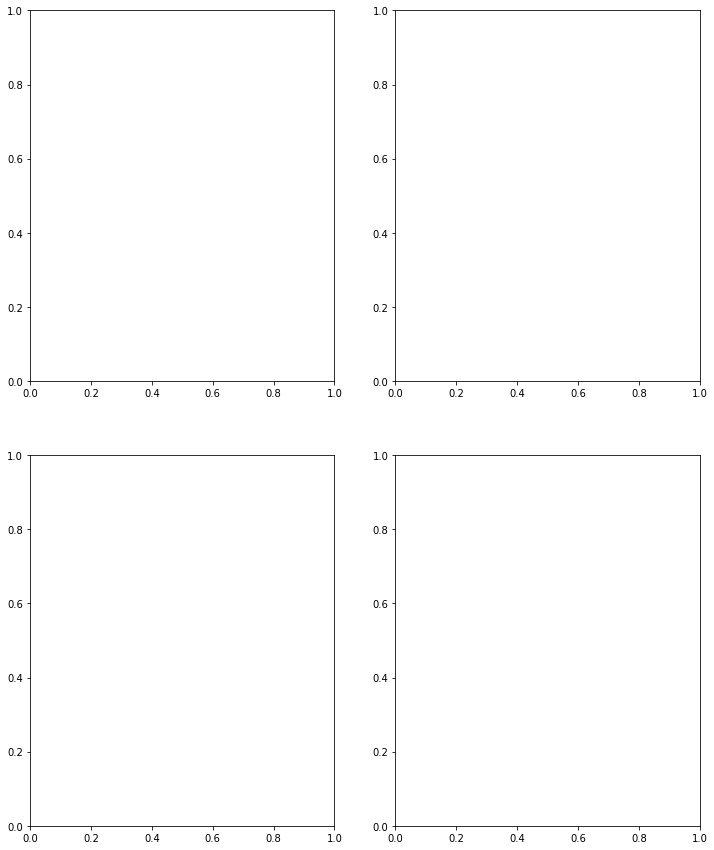

In [10]:
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,15))
byg_opstx_dppg = []
for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            op_stx.extend(order_param_1)
            
        except:
            print("no data  {}  ".format(direc),end="")
    byg_opstx_dppg.append(op_stx)
byg_opstx_dppg = np.asarray(byg_opstx_dppg)
stat_opstx =[]
byg_opstx_dppg[0][:,0]
b = np.where(byg_opstx_dppg[0][:,0]==2.)
for j,z in enumerate(DPPG_fol[1:]):
    stats_op_stx =[]
    for i in range(24):
        listt=[byg_opstx_dppg[j][:,1][i],byg_opstx_dppg[j][:,1][i+24],byg_opstx_dppg[j][:,1][i+48],byg_opstx_dppg[j][:,1][i+72],byg_opstx_dppg[j][:,1][i+96]]
        stats_op_stx.append((np.mean(np.mean(listt)),np.std(listt)))
    ax[0][0].scatter(np.arange(23,47),np.asarray(stats_op_stx)[:,0],label=z)
    ax[0][0].errorbar(np.arange(23,47),np.asarray(stats_op_stx)[:,0],yerr=np.asarray(stats_op_stx)[:,1])
    ax[0][0].set_xticks(np.arange(23,48))
    ax[0][0].set_xticklabels(np.arange(23,48),fontsize=9)
ax[0][0].legend()
byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            op_stx.extend(order_param_1)

        except:
            print("no data  {}  ".format(direc),end="")
    byg_opstx_dmpg.append(op_stx)
byg_opstx_dmpg = np.asarray(byg_opstx_dmpg)

byg_opstx_dmpg[0][:,0]
b = np.where(byg_opstx_dmpg[0][:,0]==2.)
stat_opstx =[]
for j,z in enumerate(DMPG_fol[1:]):
    stats_op_stx =[]
    for i in range(24):
        listt=[byg_opstx_dmpg[j][:,1][i],byg_opstx_dmpg[j][:,1][i+24],byg_opstx_dmpg[j][:,1][i+48],byg_opstx_dmpg[j][:,1][i+72],byg_opstx_dmpg[j][:,1][i+96]]
        stats_op_stx.append((np.mean(np.mean(listt)),np.std(listt)))
    ax[0][1].scatter(np.arange(23,47),np.asarray(stats_op_stx)[:,0],label=z)
    ax[0][1].errorbar(np.arange(23,47),np.asarray(stats_op_stx)[:,0],yerr=np.asarray(stats_op_stx)[:,1])
    ax[0][1].set_xticks(np.arange(23,48))
    ax[0][1].set_xticklabels(np.arange(23,48),fontsize=9)
ax[0][1].legend()
fig.suptitle("Order parameter STX ")
plt.subplots_adjust(top=0.95)

In [ ]:
'''

## every dihedral of every replica of every system 
#for direc in Sim_Direc:
#    for replica in range(1,6):
#        work_dir = ("{}{}".format(direc,replica))
#        files = os.listdir("{}/{}".format(bas_dir[0],work_dir))
#        for x in files:
#            if("dihedral" in x and not (x[0]=="#")):
                try:
                    dihe_dat = np.genfromtxt("{}/{}/{}".format(bas_dir[0],work_dir,x),skip_header=26)
                    plt.hist(dihe_dat[:,1],bins=50,alpha=0.2)
                except:
                    print(work_dir)
                    '''

In [ ]:
Sim_Direc2 = []
for i in Sim_Direc:
    if("MEM" not in i):
        Sim_Direc2.append(i)
Sim_Direc2

In [ ]:
fig , ax = plt.subplots(8,10,figsize=(20,35))
## every dihedral of every replica of every system 
for j,direc in enumerate(Sim_Direc2):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        files = os.listdir("{}/{}".format(bas_dir[0],work_dir))
        dih_num = -1
        for x in files:
            count= 0
            if("dihedral" in x and not (x[0]=="#") and count < 10):
                count= count+1
                try:
                    dih_num = dih_num + 1  
                    dihe_dat = np.genfromtxt("{}/{}/{}".format(bas_dir[0],work_dir,x),skip_header=26)
                    ax[j, dih_num].hist(dihe_dat[:,1],bins=50,alpha=0.2)
                    ax[j, dih_num].set_title(x[-15:-4])
                    ax[j][0].set_ylabel("{}".format(direc))
                except:
                    print("{}/{}/{}".format(bas_dir[0],work_dir,x))
fig.tight_layout()

In [ ]:
fig , ax = plt.subplots(8,10,figsize=(20,35))
## every dihedral of every replica of every system 
for j,direc in enumerate(Sim_Direc2):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        files = os.listdir("{}/{}/".format(bas_dir[0],work_dir))
        dih_num = -1
        files2 = [i for i in files if "dihedral" in i ]
        for x in files2[10:]:
            if("dihedral" in x and not (x[0]=="#") ):
                try:
                    dih_num = dih_num + 1  
                    dihe_dat = np.genfromtxt("{}/{}/{}".format(bas_dir[0],work_dir,x),skip_header=26)
                    ax[j, dih_num].hist(dihe_dat[:,1],bins=50,alpha=0.2)
                    ax[j, dih_num].set_title(x[-15:-4])
                    ax[j][0].set_ylabel("{}".format(direc))
                except:
                    print("{}/{}/{}".format(bas_dir[0],work_dir,x))
        #plt.figure()
        #plt.title("{}".format(direc))
        #plt.hist(dihe_dat[:,1],bins=50)
fig.tight_layout()

In [ ]:
for i in range(0,6):
    print("./{}{}/{}dihedral44-45-46-47.xvg".format(Sim_Direc[1],i.Sim_Direc[1]))
    #dihe = np.genfromtxt("./{}{}/{}dihedral44-45-46-47.xvg".format(Sim_Direc[1],i.Sim_Direc[1][:-1]))

In [ ]:
lip_15=[]
lip_15o3=[]
lip_stx=[]
lip_stxo3=[]
for direc in Sim_Direc:
    for replica in range(1,6):
        try:
            if("15" in direc):
                work_dir = ("{}{}".format(direc,replica))
                sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
                #plt.figure(figsize=(8,5))
                density_phos = np.genfromtxt(("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
                p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
                p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
                thic = p_2-p_1
                lip_15.append(thic)
                print("{}_{} thicness          {:.4f}".format(direc[:-1],replica,thic))
                pos_sug_1 = (sugar_den[:int(len(sugar_den[:,0])/2),0][np.argmax(sugar_den[:int(len(sugar_den[:,0])/2),1])])
                pos_sug_2 = (sugar_den[int(len(sugar_den[:,0])/2):,0][np.argmax(sugar_den[int(len(sugar_den[:,0])/2):,1])])
                lip_15o3.append((pos_sug_1,pos_sug_2))
                print("{}_{} sugar position 1  {:.4f} ".format(direc[:-1],replica,(pos_sug_1-p_1)))
                print("{}_{} sugar position 2  {:.4f} \n ".format(direc[:-1],replica,(pos_sug_2-p_1)))
            else:
                work_dir = ("{}{}".format(direc,replica))
                sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
                #plt.figure(figsize=(8,5))
                density_phos = np.genfromtxt(("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
                #plt.plot(density_phos[:,0],density_phos[:,1]/np.max(density_phos[:,1]))
                #plt.scatter(sugar_den[:,0],sugar_den[:,1]/np.max(sugar_den[:,1]),label="O3_sugar",c="r")
                #plt.axvline(sugar_den[:,0][np.argmax(sugar_den[:,1])],linestyle="--",color="r")
                p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
                p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
                thic = p_2-p_1
                lip_stx.append(thic)
                print("{}_{} thicness          {:.4f}".format(direc[:-1],replica,thic))
                #plt.scatter(sugar_den[:,0],sugar_den[:,1]/np.max(sugar_den[:,1]),label="O3_sugar",c="r")
                pos_sug = (sugar_den[:,0][np.argmax(sugar_den[:,1])])
                print("{}_{} sugar position 1  {:.4f} \n ".format(direc[:-1],replica,(pos_sug-p_1)))
                lip_stxo3.append(pos_sug)
        except:
            print("no data in {}".format(direc))
for i in Sim_Direc:
    print(i,end="")


# Data for thickness

reading from MEM-MG/1   no data  MEM-MG/  reading from MEM-MG/2   no data  MEM-MG/  reading from MEM-MG/3   no data  MEM-MG/  reading from MEM-MG/4   no data  MEM-MG/  reading from MEM-MG/5   no data  MEM-MG/  reading from STX-DMPG/1   3.3571
reading from STX-DMPG/2   3.50752
reading from STX-DMPG/3   3.40114
reading from STX-DMPG/4   3.4249
reading from STX-DMPG/5   3.51178
reading from STXQM-DMPG/1   3.29278
reading from STXQM-DMPG/2   3.3162700000000003
reading from STXQM-DMPG/3   3.53826
reading from STXQM-DMPG/4   3.3207
reading from STXQM-DMPG/5   3.43536
reading from 15STX-DMPG/1   3.60108
reading from 15STX-DMPG/2   3.5751
reading from 15STX-DMPG/3   3.73204
reading from 15STX-DMPG/4   3.60296
reading from 15STX-DMPG/5   3.6114
reading from MEM-PG/1   no data  MEM-PG/  reading from MEM-PG/2   no data  MEM-PG/  reading from MEM-PG/3   no data  MEM-PG/  reading from MEM-PG/4   no data  MEM-PG/  reading from MEM-PG/5   no data  MEM-PG/  reading from STX-DPPG/1   3.80332
reading fr

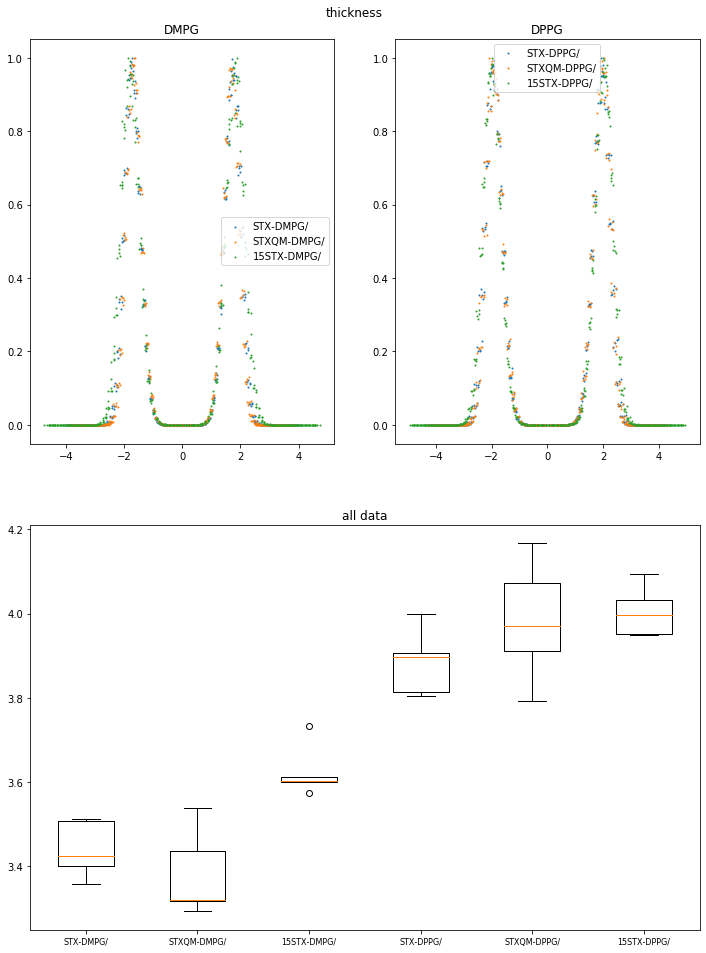

In [9]:
# plot APL vs time of every system in the same subplot 
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(2, 2)
bygroup_sugar_dmpg = []
bg_p_dmpg = []
thic_bg=[]
lip_mem=[]
for j,direc in enumerate(DMPG_fol):
    sug_den=[]
    p_den=[]
    lip_1stx=[]
    lip_15o3=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
            density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            sug_den.extend(sugar_den)
            p_den.extend(density_phos)
            p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
            p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
            thic = p_2-p_1
            lip_mem.append(thic)
        except:
            print("no data  {}  ".format(direc),end="")
    bygroup_sugar_dmpg.append(sug_den)
    bg_p_dmpg.append(p_den)
    #thic_bg.append(lip_mem)
    
    
    
bygroup_sugar_dppg = []
bg_p_dppg = []
for j,direc in enumerate(DPPG_fol):
    sug_den=[]
    p_den=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
            density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            sug_den.extend(sugar_den)
            p_den.extend(density_phos)
            p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
            p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
            thic = p_2-p_1
            print(thic)
            lip_mem.append(thic)
        except:
            print("no data  {}  ".format(direc),end="")
    bygroup_sugar_dppg.append(sug_den)
    bg_p_dppg.append(p_den)
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title('DMPG')
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("DPPG")
temp = np.asarray(bygroup_sugar_dmpg[1])

for i,j in enumerate(DMPG_fol):
    if("MEM" not in j  ):
        #tem= np.asarray(bygroup_sugar_dmpg[i])
        #f_ax1.scatter(tem[:,0],tem[:,1]/max(tem[:,1]),label="$O_3$ sugar STX {}".format(j),s=2)
        tem2 = np.asarray(bg_p_dmpg[i])
        f_ax1.scatter(tem2[:,0],tem2[:,1]/max(tem2[:,1]),label=j,s=1)
for i,j in enumerate(DPPG_fol):
    if("MEM" not in j  ):
        #tem= np.asarray(bygroup_sugar_dppg[i])
        #f_ax2.scatter(tem[:,0],tem[:,1]/max(tem[:,1]),label="$O_3$ sugar STX {}".format(j),s=2)
        tem2 = np.asarray(bg_p_dppg[i])
        f_ax2.scatter(tem2[:,0],tem2[:,1]/max(tem2[:,1]),label=j,s=1)
f_ax2.legend()
f_ax1.legend()
composite_list = [lip_mem[x:x+5] for x in range(0, len(lip_mem),5)]
names = DMPG_fol[1:] + DPPG_fol[1:]
#alldat = bygroup_sugar_dmpg + bygroup_sugar_dppg
alldat=bg_p_dmpg+bg_p_dppg
f_ax3 = fig.add_subplot(gs[1,:])
f_ax3.set_title('all data')
f_ax3.boxplot(composite_list)
f_ax3.set_xticklabels(names,fontsize=8)
fig.suptitle("thickness")
plt.subplots_adjust(top=0.95)

reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

ValueError: x and y must be the same size

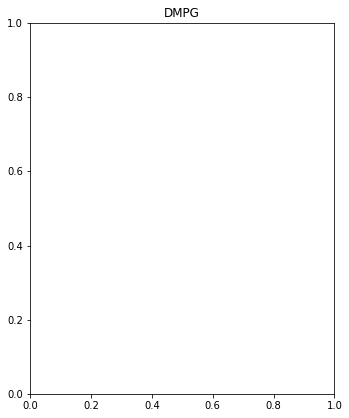

In [89]:
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(2, 2)
bygroup_sugar_dmpg = []
bg_p_dmpg = []
dist_dmpg=[]
thic_bg=[]
lip_mem=[]
for j,direc in enumerate(DMPG_fol[1:]):
    sug_den=[]
    p_den=[]
    dist=[]
    lip_1stx=[]
    lip_15o3=[]
    for replica in range(1,6):
        #try:
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
        density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        sug_den.append(sugar_den[:,1])
        p_den.append(density_phos[:,1])
        dist.append(density_phos[:,0])
        if("MEM" in direc):
            bygroup_sugar_dmpg.append(ch1)
            break
        if(replica==5):
            sum_temp=(sug_den[0]+sug_den[1]+sug_den[2]+sug_den[3]+sug_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(sug_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_sugar_dmpg.append((mean,std))
            sum_temp=(p_den[0]+p_den[1]+p_den[2]+p_den[3]+p_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(p_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bg_p_dmpg.append((mean,std))
            sum_temp2=(dist[0]+dist[1]+dist[2])
            mean2=sum_temp2/3
            dist_dmpg.append(mean2)
        #except:
        #    print("no data")
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title('DMPG')
f_ax1.scatter(dist_dmpg[0],bygroup_sugar_dmpg[0][0])
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("DPPG")
                

# Orientation

In [ ]:
fig , ax = plt.subplots(1,6,figsize=(15,5))
## every dihedral of every replica of every system 
for j,direc in enumerate(Sim_Direc2):
    #plt.figure()
    for replica in range(1,6):
        try:
            work_dir = ("{}{}".format(direc,replica))
            #try:
            orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            ax[j].hist(orien[:,1],bins=50,alpha=0.2)
            ax[j].set_title("{}".format(work_dir))
            ax[j].legend("{}".format(replica))
            #ax[j][0].set_ylabel("{}".format(direc))
        except:
            print("no data at {}".format(direc))
            #print("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
fig.tight_layout()

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
#fig2 , ax2 = plt.subplots(1,2,figsize=(15,5))
## every dihedral of every replica of every system 
for j,direc in enumerate(Sim_Direc2):
    if("DPPG" in direc and "15" in direc and not "QM" in direc):
        print(direc)
        for replica in range(1,3):
            try:
                work_dir = ("{}{}".format(direc,replica))
                #try:
                orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
                print(len(orien[:,0]))
                ax[0].hist(orien[:,1],bins=20,alpha=0.2)
                ax[0].hist(orien[:,-2],bins=20,alpha=0.2)
                ax[0].set_title("{}".format(work_dir))
                ax[0].legend("{}".format(replica))
            #ax[j][0].set_ylabel("{}".format(direc))
            except:
                print("no data at {}".format(direc))
                #print("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
    if("DMPG" in direc and "15" in direc and not "QM" in direc):
        print(direc)
        for replica in range(1,3):
            try:
                work_dir = ("{}{}".format(direc,replica))
                #try:
                orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
                ax[1].hist(orien[:,1],bins=20,alpha=0.2)
                ax[1].hist(orien[:,-2],bins=20,alpha=0.2)
                ax[1].set_title("{}".format(work_dir))
                #ax[1].legend("{}".format(replica))
            #ax[j][0].set_ylabel("{}".format(direc))
            except:
                print("no data at {}".format(direc))
                #print("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
    fig.tight_layout()

In [ ]:
Sim_Direc2

In [ ]:
## std of a sample np.std(ddof=1)
for direc in Sim_Direc2:
    up = []
    down = []
    if("15STX" in direc):
        plt.figure()
        for replica in range(1,6):
            work_dir = ("{}{}".format(direc,replica))
            orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
            for j in range(1,65):
                if(np.mean(orien[:,j]) > 90):
                   up.extend(orien[:,j])
                else:
                   down.extend(orien[:,j])
            if(replica==5):
                plt.hist(up,bins=50,alpha=0.5)
                plt.hist(down,bins=50,alpha=0.5)
                print("{} = mean of orientation up in up  {}".format(np.mean(up),direc))
                print("{} = mean of orientation up in down {}".format(np.mean(down),direc))
                print("{} = std of orientation up in up {}".format(np.std(up),direc))
                print("{} = std of orientation up in down {}".format(np.std(down),direc))
                plt.title("{}".format(direc))


In [ ]:
## std of a sample np.std(ddof=1)
fig ,ax = plt.subplots(1,4,figsize=(15,8))
for j,direc in enumerate(Sim_Direc2):
    #print(direc)
    if("STX" in direc and not "15" in direc):
        print(direc,j)
        for replica in range(1,6):
            if(j==6):
                work_dir = ("{}{}".format(direc,replica))
                orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
                ax[j-3].hist(orien[:,1],bins=50)
                ax[j-3].set_title("{}".format(direc))
            else:
                work_dir = ("{}{}".format(direc,replica))
                orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
                ax[j-2].hist(orien[:,1],bins=50)
                ax[j-2].set_title("{}".format(direc))
        #plt.legend()


In [ ]:
for direc in Sim_Direc:
    plt.figure(figsize=(10,5))
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("STX" in direc):
            try:    
                ang_t = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
                plt.plot(ang_t[:,0],ang_t[:,1],label=("{}-{}".format(direc,replica)))
                plt.legend(loc=(1.05,0.25))
            except:
                print("No data {} ".format(direc))
        plt.xlabel("t (ps)")
        plt.ylabel("Angle ( ° )")
        plt.title("time vs angle of {}".format(direc))
    plt.show()

In [ ]:
# plot APL vs time of every system in the same subplot 
fig,ax  = plt.subplots(8,sharex=False,figsize=(15,20))
for j,direc in enumerate(Sim_Direc2):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=26)     
            ax[j].plot(orien[:,0],orien[:,1],label=("{}-{}".format(direc,replica)))
            ax[j].set_title("{}".format(direc))

            #fig.add_subplot(box_z[:,0],APL[:-1],label=("{}-{}".format(direc,replica)))
            #ax.axhline(np.mean(APL),c="black",linestyle='--',label="promedio {:.3f}".format(np.mean(box_z[:,1])))
            #plt.legend(loc=(1.05,0.25))
        except:

            print("no data  {}".format(direc))

fig.tight_layout()

In [ ]:
## every dihedral of every replica of every system 
for j,direc in enumerate(Sim_Direc2):
    plt.figure()
    for replica in range(1,6):
        try:
            work_dir = ("{}{}".format(direc,replica))
            #try:
            orien = np.genfromtxt("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        #print("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        #plt.plot(orien[:,1])
            plt.hist(orien[:,1],bins=50,alpha=0.2,label="{}".format(replica))
            plt.title("{}".format(work_dir))
            plt.legend()
            
        #ax[j][0].set_ylabel("{}".format(direc))
        except:
            print("no data at {}".format(direc))
            #print("{}/{}/{}_{}ang_t.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))


reading from MEM-MG/1   no data  MEM-MG/  reading from MEM-MG/2   no data  MEM-MG/  reading from MEM-MG/3   no data  MEM-MG/  reading from MEM-MG/4   no data  MEM-MG/  reading from MEM-MG/5   no data  MEM-MG/  reading from STX-DMPG/1   1.67855 -1.67855
3.3571
reading from STX-DMPG/2   1.75376 -1.75376
3.50752
reading from STX-DMPG/3   1.70057 -1.70057
3.40114
reading from STX-DMPG/4   1.71245 -1.71245
3.4249
reading from STX-DMPG/5   1.75589 -1.75589
3.51178
reading from STXQM-DMPG/1   1.64639 -1.64639
3.29278
reading from STXQM-DMPG/2   1.69582 -1.62045
3.3162700000000003
reading from STXQM-DMPG/3   1.72892 -1.80934
3.53826
reading from STXQM-DMPG/4   1.66035 -1.66035
3.3207
reading from STXQM-DMPG/5   1.75672 -1.67864
3.43536
reading from 15STX-DMPG/1   1.80054 -1.80054
3.60108
reading from 15STX-DMPG/2   1.78755 -1.78755
3.5751
reading from 15STX-DMPG/3   1.86602 -1.86602
3.73204
reading from 15STX-DMPG/4   1.80148 -1.80148
3.60296
reading from 15STX-DMPG/5   1.8057 -1.8057
3.6114


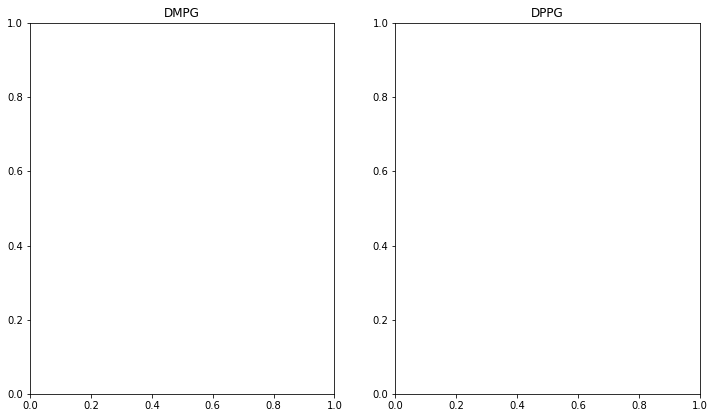

In [10]:
fig = plt.figure(figsize=(12,15))
gs = fig.add_gridspec(2, 2)
bygroup_sugar_dmpg = []
bg_p_dmpg = []
thic_bg=[]
lip_mem=[]
for j,direc in enumerate(DMPG_fol):
    sug_den=[]
    p_den=[]
    lip_1stx=[]
    lip_15o3=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            print("reading from {}   ".format(work_dir),end="")
            sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
            density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            sug_den.extend(sugar_den)
            p_den.extend(density_phos)
            
            p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
            p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
            thic = p_2-p_1
            print(p_2,p_1)
            print(thic)
            lip_mem.append(thic)
        except:
            print("no data  {}  ".format(direc),end="")
    bygroup_sugar_dmpg.append(sug_den)
    bg_p_dmpg.append(p_den)
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title('DMPG')
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title("DPPG")
temp = np.asarray(bygroup_sugar_dmpg[1])

In [ ]:
import pandas as pd 
data = pd.read_csv("./15STX_DMPG/1/orien.dat",delimiter="\t")
x= np.array(data)
new =[]
for i in x:
    for j in (i[0].split(" ")):
        if(j !=""):
            new.append(int(j))

new2 = np.zeros(len(new))
for i in range(0,len(new)-1,2):
    #print(new[i+1],new[i])
    new2[i]=int(new[i+1])
    new2[i+1]=int(new[i])
new3 = np.zeros((8,15))
count= 0
for i in range(8):
    for j  in range(15):
        if(count<len(new2)):
            new3[i][j]=int(new2[count])
            count = count +1 
new4 = pd.DataFrame(new3)


In [ ]:
new4.astype(int)

In [ ]:
new4.astype(int).to_csv("test.txt",sep='\t',header=False,index=False)

In [ ]:
!cat test.txt

In [ ]:
traj_1 = mdt.load("./15STX_DPPG/1/traj_comp.xtc",top="./15STX_DPPG/1/confout.gro")

In [ ]:
w = nv.show_mdtraj(traj_1)
w.clear_representations()
w.add_licorice("not HOH",opacity=0.09)
#w.add_cartoon("DPPG",opacity=0.09)
w.add_licorice("LIG")
w